In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../datatset/dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [8]:
uniq = data.nunique()
uniq

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [41]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [43]:
print(data.isnull().sum())
print()
print(data.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [40]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [44]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# Age, Stroke
1. 나이가 듦에 따라 발병률이 높아진다.
    1-1. 80살 부근에서 급격히 증가하던 발병률의 증가세가 한 풀 꺾인다. ==> 80살 부근에서 다들 사망?
2. 여성이 남성보다 발병률이 높다.

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


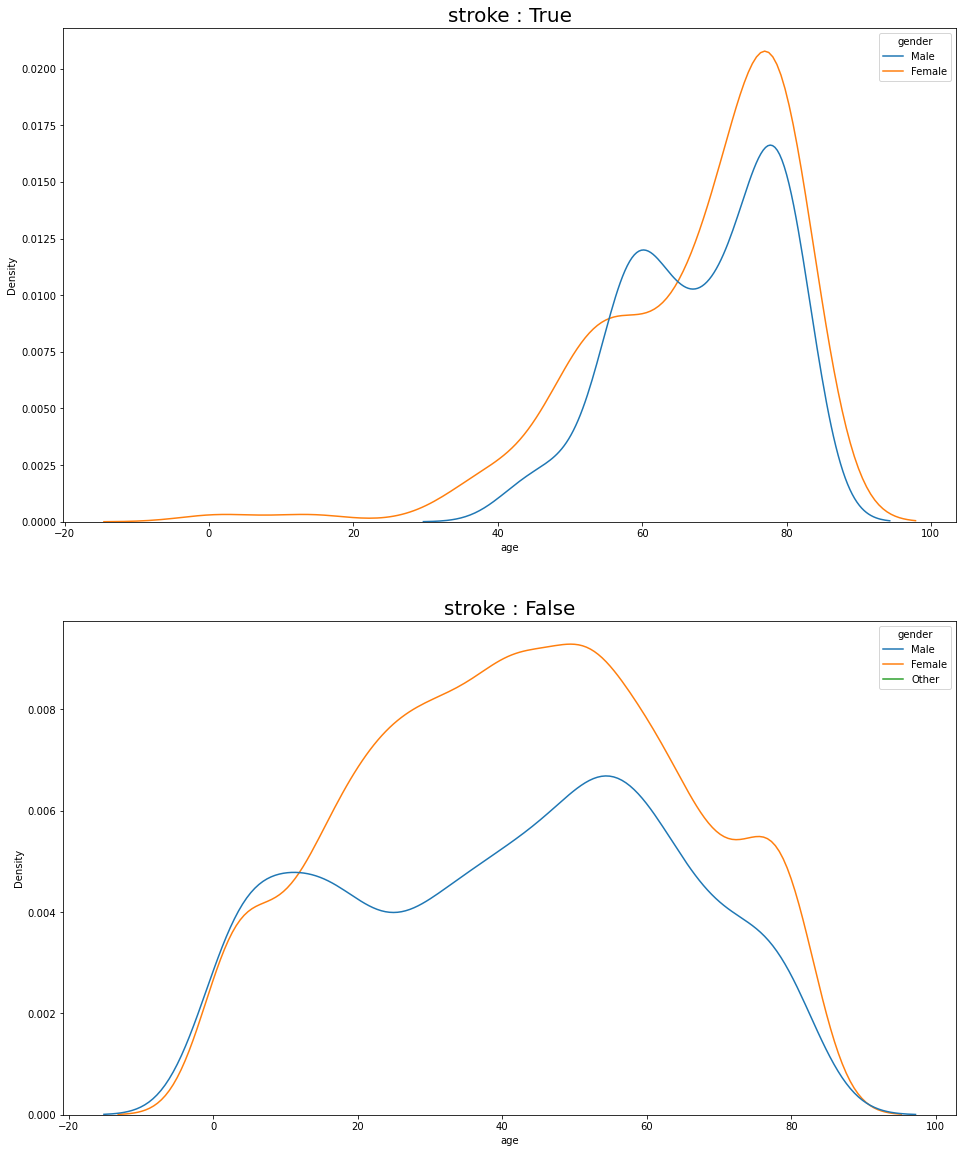

In [193]:
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(2,1,1)
ax.set_title('stroke : True', fontsize=20)
sns.kdeplot(x='age', hue='gender', data=data[data['stroke']==1], ax=ax)
ax = fig.add_subplot(2,1,2)
ax.set_title('stroke : False',fontsize=20)
sns.kdeplot(x='age', hue='gender', data=data[data['stroke']==0],  ax=ax)

plt.show()

이 때 age: 60부근, 80부근에서 발병률이 peak를 찍는 것은
그 나이대의 사람 수가 많아서 그렇다고 예상할 수 있다.

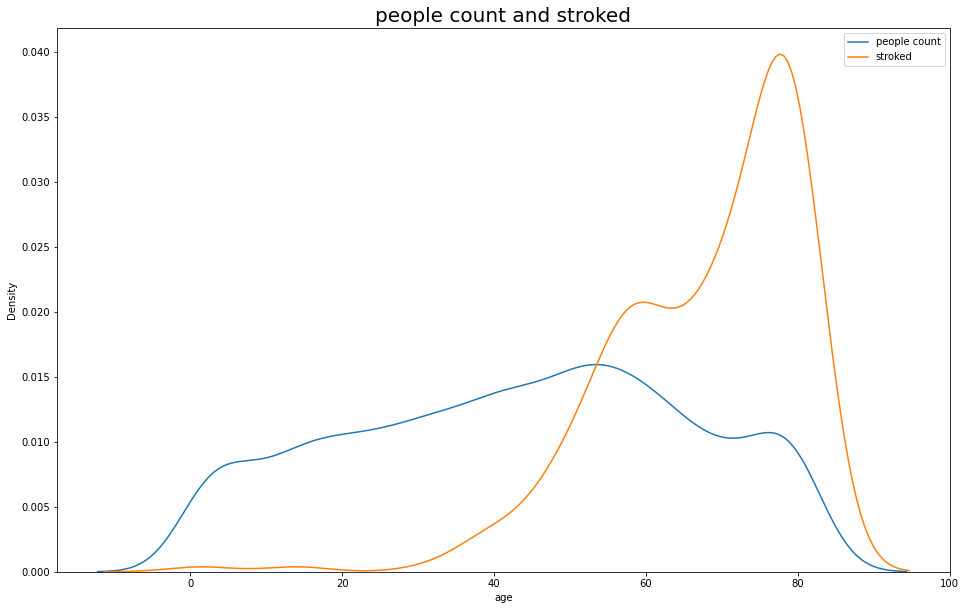

In [191]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('people count and stroked', fontsize=20)
sns.kdeplot(x='age', data=data, ax=ax, label='people count')
sns.kdeplot(x='age', data=data[data['stroke']==1], ax=ax, label='stroked')
ax.legend()
plt.show()

In [38]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

# Age, Some personal factor

## 1. Hypertension

### 나이에 따른 뇌졸중 환자 비율과 고혈압 여부에 따른 분류

1. 고혈압의 존재 여부와 관계 없이 나이에 따른 뇌졸중 비율 증가세는 같다.
즉, 고혈압의 존재 여부와 뇌졸중 발병률 사이에는 연관성이 부족하다.
1-1. 나이에 듦에 따라, 뇌졸중과 고혈압을 막론하고 질병을 가지는 비율이 높아진다고도 볼 수 있다.

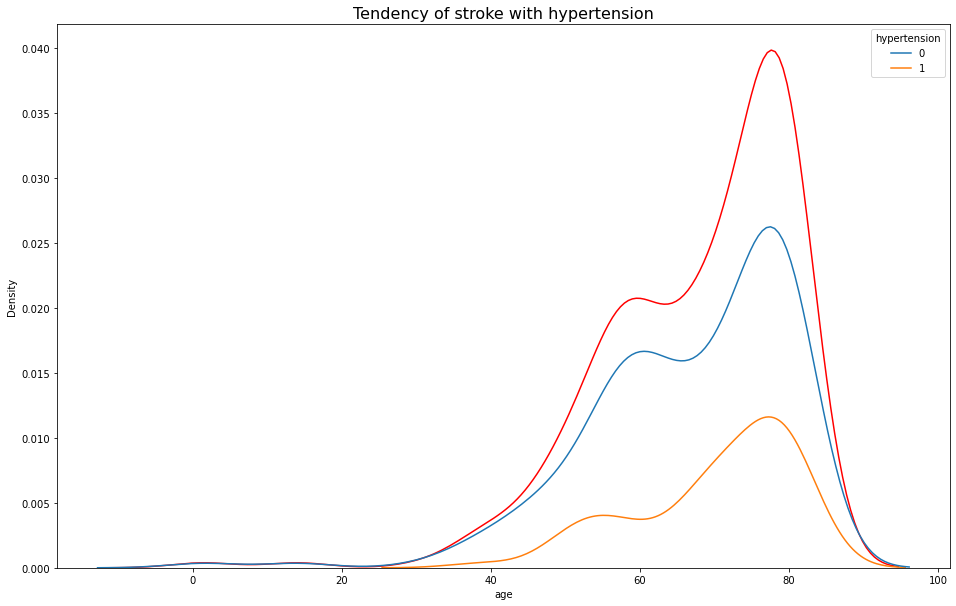

In [181]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Tendency of stroke with hypertension', fontsize=16)

sns.kdeplot(x='age',
            data=data[data['stroke']==1],
            ax=ax, color='r', label='stroke')
ax.legend()
sns.kdeplot(x='age',
            data=data[data['stroke']==1],
            hue='hypertension',
            ax=ax)
plt.show()

## 2. Heart disease

### 나이에 따른 뇌졸중 환자 비율과 심장병 여부에 따른 분류

1.

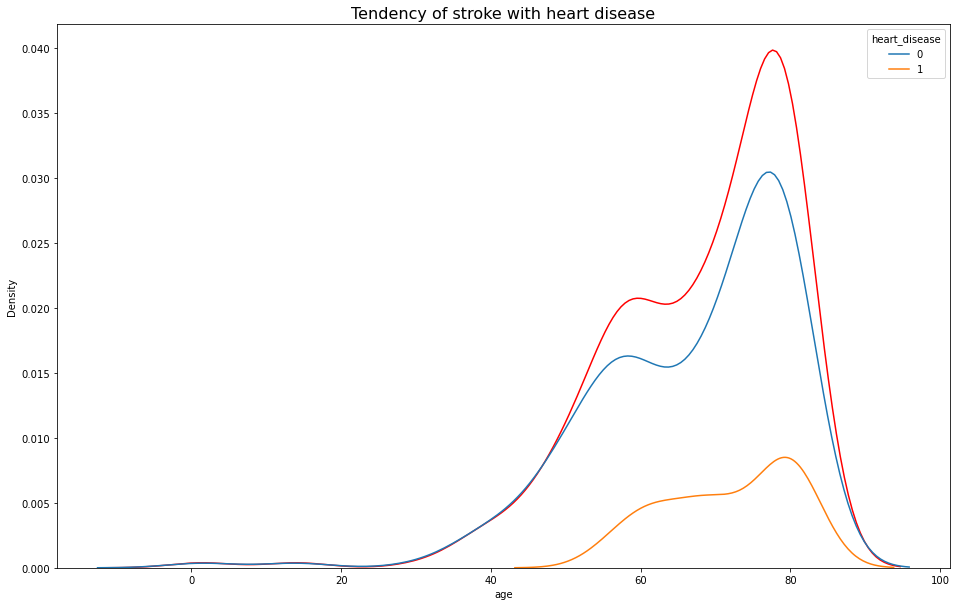

In [182]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Tendency of stroke with heart disease', fontsize=16)
sns.kdeplot(x='age',
            data=data[data['stroke']==1],
            ax=ax, color='r')
sns.kdeplot(x='age',
            data=data[data['stroke']==1],
            hue='heart_disease',
            ax=ax)
plt.show()

## 3. Smoking status

1. 흡연 빈도가 적을수록 환자의 평균 연령이 낮아지는 것을 알 수 있다.

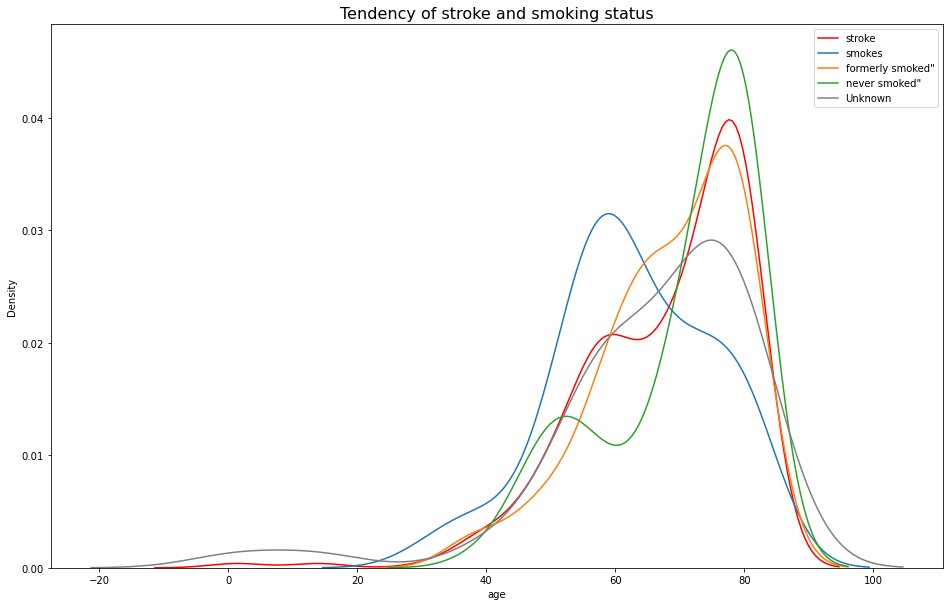

In [112]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Tendency of stroke and smoking status', fontsize=16)
sns.kdeplot(x='age',
            data=data[data['stroke']==1],
            ax=ax, label='stroke', color='r')
sns.kdeplot(x='age',
            data=data[(data['stroke']==1) & (data['smoking_status']=='smokes')],
            # hue='smoking_status',
            ax=ax, label='smokes')
sns.kdeplot(x='age',
            data=data[(data['stroke']==1) & (data['smoking_status']=='formerly smoked')],
            # hue='smoking_status',
            ax=ax, label='formerly smoked"')
sns.kdeplot(x='age',
            data=data[(data['stroke']==1) & (data['smoking_status']=='never smoked')],
            # hue='smoking_status',
            ax=ax, label='never smoked"')
sns.kdeplot(x='age',
            data=data[(data['stroke']==1) & (data['smoking_status']=='Unknown')],
            # hue='smoking_status',
            ax=ax, label='Unknown', color='gray')
plt.legend()
plt.show()

In [169]:
smoke_data = data[data['stroke']==1][['smoking_status', 'age']].groupby('smoking_status').describe()
smoke_data


age                                                      
                count       mean        std    min   25%   50%    75%   max
smoking_status                                                             
Unknown          47.0  65.836596  16.236866   1.32  58.0  71.0  77.50  82.0
formerly smoked  70.0  68.628571  10.902960  38.00  63.0  70.0  78.00  82.0
never smoked     90.0  70.311111  11.562866  39.00  63.0  74.0  79.00  82.0
smokes           42.0  62.809524  12.200036  32.00  55.5  61.0  71.75  82.0

### 3-1. Smoking status and Hypertension

- 역시나 흡연 빈도가 낮아짐에 따라 고혈압 환자의 평균 연령이 낮아짐을 볼 수 있다.
- 특히, 흡연 빈도에 따른 고혈압 환자의 평균 연령은 흡연 빈도에 따른 뇌졸중 환자의 평균 연령보다 어리다.
  (고혈압이 뇌졸중보다 발병 연령이 낮다?)

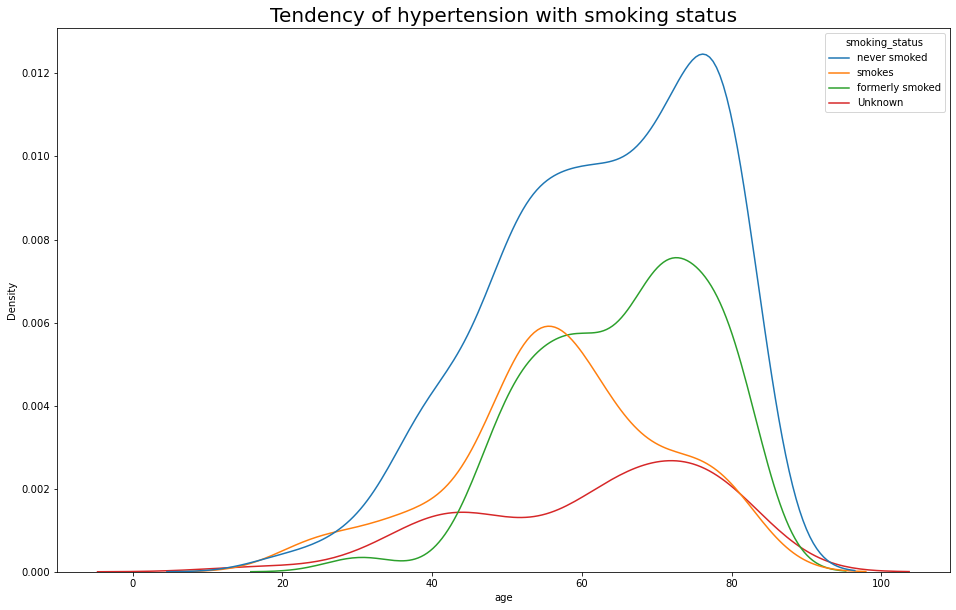

age                                                     
                 count       mean        std   min    25%   50%   75%   max
smoking_status                                                             
Unknown           52.0  61.653846  15.943386  17.0  45.75  65.0  75.0  82.0
formerly smoked  120.0  65.583333  11.493939  29.0  57.00  69.0  75.0  82.0
never smoked     232.0  62.767241  14.309720  19.0  52.00  64.0  76.0  82.0
smokes            94.0  57.021277  13.991533  23.0  51.00  56.5  67.0  81.0

In [178]:
plt.figure(figsize=(16,10))
plt.title('Tendency of hypertension with smoking status', fontsize=20)
sns.kdeplot(x='age', data=data[data['hypertension']==1], hue='smoking_status')
plt.show()

smoke_hypertension = data[data['hypertension']==1][['smoking_status', 'age']].groupby('smoking_status').describe()
smoke_hypertension

### 3-2. Smoking status and Heart disease

- 심장병에 대해서도 흡연 비율이 적어짐에 따라 환자의 평균 연령이 어려지는 것을 확인할 수 있지만
그 연령의 차이는 매우 작다. 즉, 흡연 빈도와 심장병의 연관관계가 약하다고 볼 수 있다.

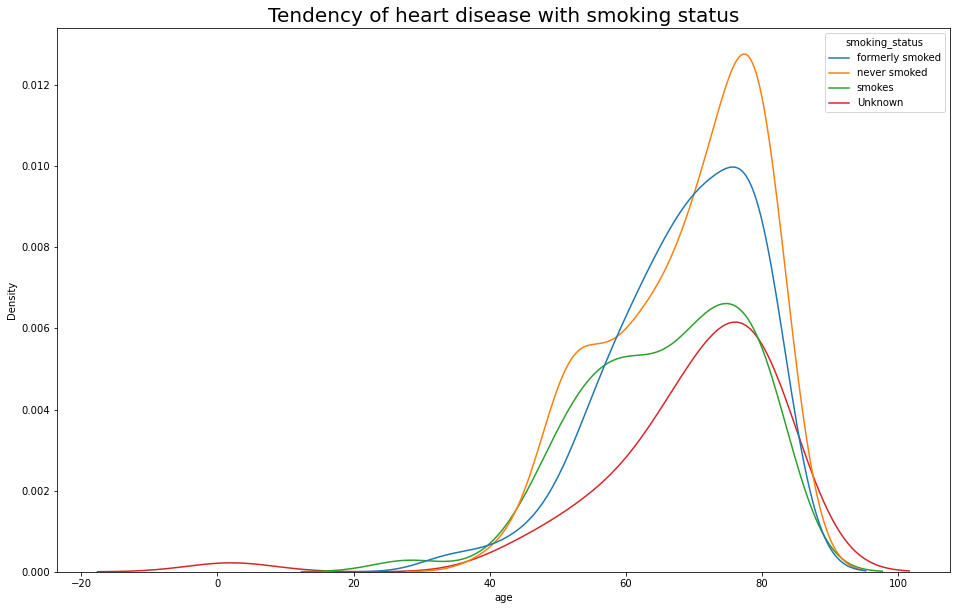

age                                                      
                count       mean        std   min    25%   50%    75%   max
smoking_status                                                             
Unknown          48.0  69.375000  14.174633   2.0  65.50  72.5  79.00  82.0
formerly smoked  77.0  68.454545  10.510077  34.0  62.00  71.0  78.00  82.0
never smoked     90.0  68.900000  10.778724  41.0  61.25  71.5  78.75  82.0
smokes           61.0  65.868852  11.877816  28.0  58.00  69.0  76.00  82.0

In [180]:
plt.figure(figsize=(16,10))
plt.title('Tendency of heart disease with smoking status', fontsize=20)
sns.kdeplot(x='age', data=data[data['heart_disease']==1], hue='smoking_status')
plt.show()

smoke_heart = data[data['heart_disease']==1][['smoking_status', 'age']].groupby('smoking_status').describe()
smoke_heart

## 4. avg_glucose_level

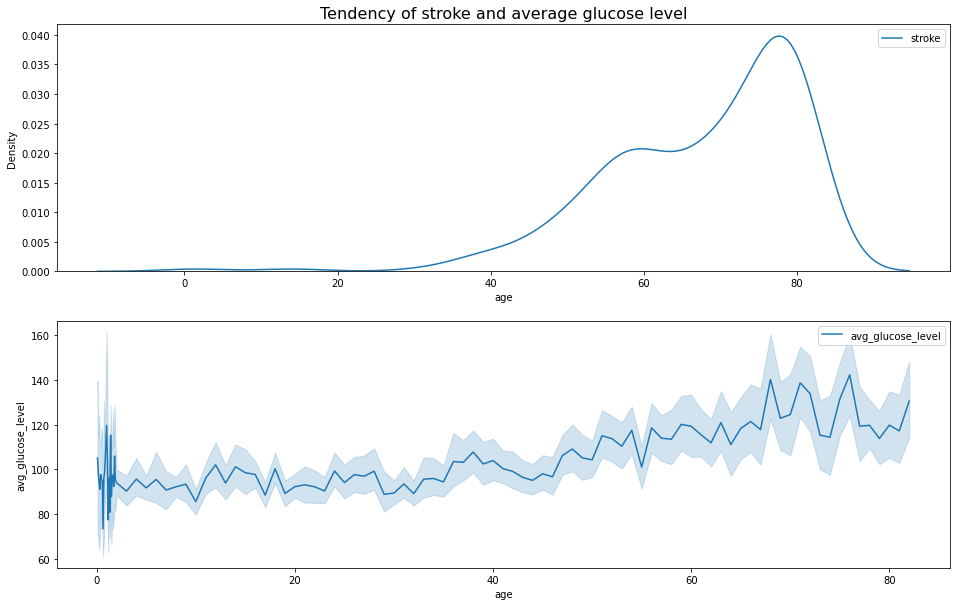

In [82]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,1,1)
ax.set_title('Tendency of stroke and average glucose level', fontsize=16)
sns.kdeplot(x='age',
            data=data[data['stroke']==1],
            ax=ax, label='stroke')
ax.legend()
ax = fig.add_subplot(2,1,2)
sns.lineplot(x='age', y='avg_glucose_level', data=data, ax=ax, label='avg_glucose_level')
ax.legend()
plt.show()

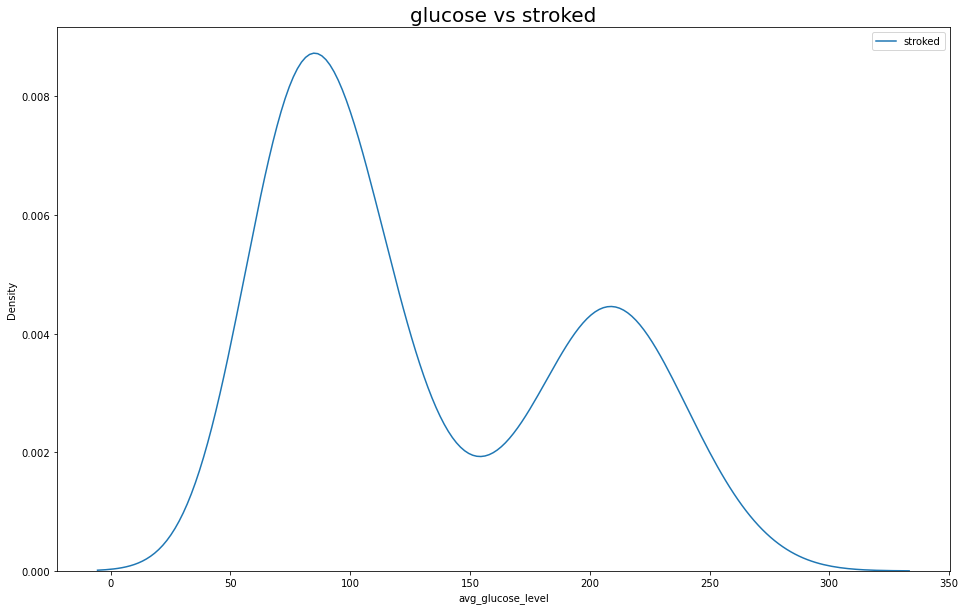

In [141]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('glucose vs stroked', fontsize=20)
sns.kdeplot(x='avg_glucose_level', data=data[data['stroke']==1],
            ax=ax, label='stroked')
ax.legend()
plt.show()

## 5. Residence_type
1. urban 이 rural보단 발병률이 높다.
2. 모양이 유사한 것은 age에 의한 보편적인 영향력일 것으로 예상한다.

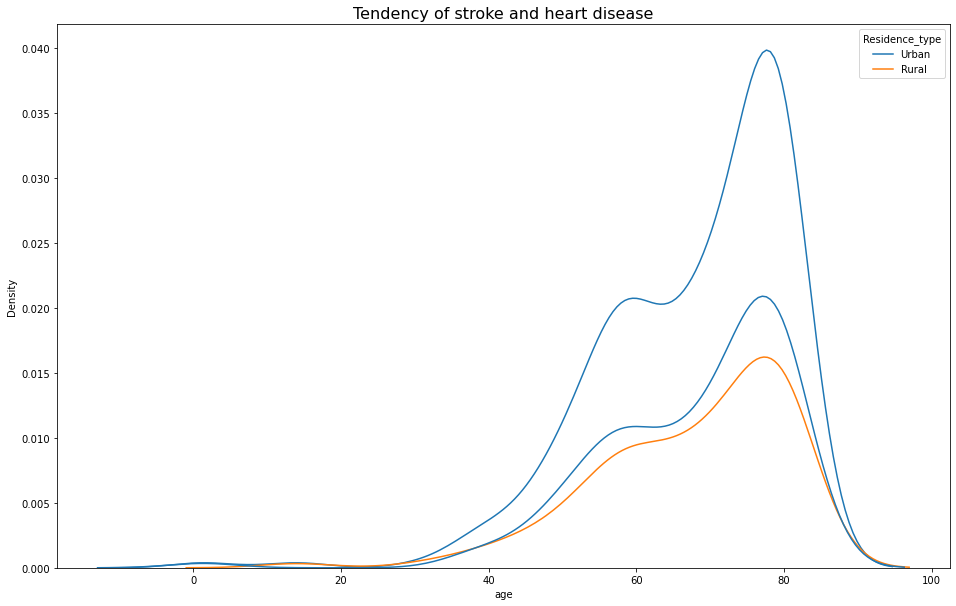

In [64]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Tendency of stroke and heart disease', fontsize=16)
sns.kdeplot(x='age',
            data=data[data['stroke']==1],
            ax=ax, label='stroke')
sns.kdeplot(x='age',
            data=data[data['stroke']==1],
            hue='Residence_type',
            ax=ax)
plt.legend()
plt.show()